In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv('data/dataset_processed.csv')

In [3]:
def str2np(string):
    string = string.strip('[]')
    return np.fromstring(string, sep=',')

labels = {'extremeleft':0, 'left':1, 'leastbiased':2, 'right':3, 'extremeright':4}

data['features'] = data.apply(lambda row : np.concatenate((str2np(row['nela_subs']), str2np(row['nela_desc']), str2np(row['open_smile_emotion']), str2np(row['open_smile_trait']))), axis=1)
data['bias_label'] = data['bias'].map(labels)
data.head()

,Unnamed: 0,bias,youtube_id,nela_subs,nela_desc,open_smile_emotion,open_smile_trait,features,bias_label
0,0,left,3FUgm3STcDw,"[0.026548672566400002, 228.0, 0.0, 43.85964912...","[0.0666666666667, 134.0, 0.00746268656716, 28....","[0.0, 0.02901588, 1.2102310000000002e-05, 0.02...","[0.0, 1.594319, 0.1108884, 0.6352705, 0.084156...","[0.026548672566400002, 228.0, 0.0, 43.85964912...",1
1,1,left,uWOUsqB8IPo,"[0.0602409638554, 88.0, 0.0113636363636, 52.27...","[0.026315789473700002, 46.0, 0.0, 26.086956521...","[0.0, 0.07521047, 0.0002319989, 0.07497848, 85...","[0.0, 2.687539, 0.5691383, 0.6887107, 0.267387...","[0.0602409638554, 88.0, 0.0113636363636, 52.27...",1
2,2,left,R4fyH7sGDGs,"[0.00787401574803, 396.0, 0.0126262626263, 47....","[0.0, 26.0, 0.0, 11.5384615385, 0.0, 0.0, 0.0,...","[0.0, 0.05582919, 0.002310781, 0.05351841, 900...","[0.0, 1.999892, 0.35671339999999996, 0.8390114...","[0.00787401574803, 396.0, 0.0126262626263, 47....",1
3,3,left,kRQmxKxAHQg,"[0.0125, 80.0, 0.0, 55.0, 0.08750000000000001,...","[0.0, 37.0, 0.0, 40.5405405405, 0.027027027026...","[0.0, 0.009473814, 0.0004224883, 0.009051326, ...","[0.0, 0.6215084, 0.6813627, 0.505678, 0.150204...","[0.0125, 80.0, 0.0, 55.0, 0.08750000000000001,...",1
4,4,left,0mx0Fay8YpI,"[0.01, 207.0, 0.0, 51.690821256, 0.01932367149...","[0.0, 24.0, 0.0, 20.8333333333, 0.041666666666...","[0.0, 0.061815010000000004, 0.0001856862, 0.06...","[0.0, 2.4150169999999997, 0.08483634, 0.515030...","[0.01, 207.0, 0.0, 51.690821256, 0.01932367149...",1


In [80]:
X = np.array(data['features'].to_list())
y = data['bias_label'].to_numpy()
print(X.shape, y.shape)

(3345, 6663) (3345,)


In [89]:
model = RandomForestClassifier(max_depth=10, n_estimators=35,max_features=30, random_state=42)
pca = PCA(n_components=200)
X_reduced = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.33, stratify=y)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('Train Accuracy: ', accuracy_score(y_train, y_train_pred))
print('Test Accuracy: ', accuracy_score(y_test, y_test_pred))


Train Accuracy:  0.8612226684515841
Test Accuracy:  0.5244565217391305


In [97]:
model = svm.LinearSVC()
pca = PCA(n_components=200)
X_reduced = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.33, stratify=y)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('Train Accuracy: ', accuracy_score(y_train, y_train_pred))
print('Test Accuracy: ', accuracy_score(y_test, y_test_pred))


Train Accuracy:  0.23337795626952254
Test Accuracy:  0.2463768115942029


In [95]:
model = MLPClassifier(alpha=0.0001, max_iter=400)
# pca = PCA(n_components=200)
# X_reduced = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('Train Accuracy: ', accuracy_score(y_train, y_train_pred))
print('Test Accuracy: ', accuracy_score(y_test, y_test_pred))

Train Accuracy:  0.4390896921017403
Test Accuracy:  0.43478260869565216


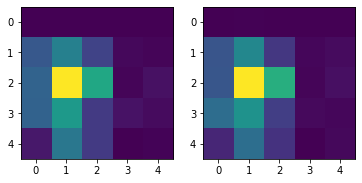

In [98]:
train_cf = confusion_matrix(y_train, y_train_pred)
test_cf = confusion_matrix(y_test, y_test_pred)
plt.figure()
plt.subplot(121)
plt.imshow(train_cf)
plt.subplot(122)
plt.imshow(test_cf)
plt.show()

100%|██████████| 9/9 [00:38<00:00,  4.25s/it]


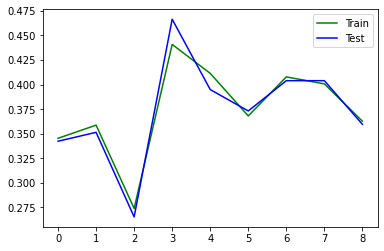

In [75]:
train_acc = []
test_acc = []
for dim in tqdm(range(100, 1000, 100)):
    pca = PCA(n_components=dim)
    X_reduced = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.33, random_state=42)
    model = MLPClassifier(alpha=0.0001, max_iter=400)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))
plt.plot(train_acc, 'g', label='Train')
plt.plot(test_acc, 'b', label='Test')
plt.legend()
plt.show()

In [25]:
train_acc = []
test_acc = []
model = RandomForestClassifier(random_state=42)
for dim in tqdm(range(100, 3400, 100)):
    pca = PCA(n_components=dim)
    X_reduced = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.33, random_state=42)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

  6%|▌         | 2/33 [00:13<03:25,  6.64s/it]


KeyboardInterrupt: 

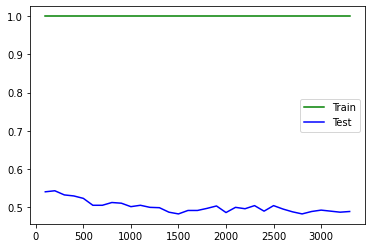

In [15]:
plt.plot(range(100, 3400, 100), train_acc, 'g', label='Train')
plt.plot(range(100, 3400, 100), test_acc, 'b', label='Test')
plt.legend()
plt.show()

In [23]:
pca = PCA(n_components=2000)
X = pca.fit_transform(X)
print(X.shape)

(3345, 2000)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
model = svm.LinearSVC()
model.fit(X_train, y_train)

LinearSVC()

In [26]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [27]:
print('Train Accuracy: ', accuracy_score(y_train, y_train_pred))
print('Test Accuracy: ', accuracy_score(y_test, y_test_pred))

Train Accuracy:  0.2534582775546631
Test Accuracy:  0.26811594202898553
